1.Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
from zfel import sase1d

2.Input parameters

In [2]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 200#31                        # n-sample points along bunch length
z_steps = 200#20                        # n-sample points along undulator
energy  = 4313.34e6                   # electron energy [eV]
eSpread = 0#1.0e-4                    # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3900                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduK = 3.5                         # undulator parameter, K [ ]
unduL = 70#30                          # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 10000*0.0                       # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No

In [3]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed}

3.1D FEL run

Kai/(density*kappa_1)*Pbeam 1.2329353357779945e-10
(4*np.pi*epsilon_0*sigmaX2*x) 1.2329353357779942e-10
(200,) (200,)


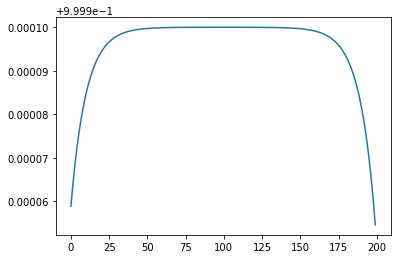

In [4]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
z,power_z,s,power_s,rho,detune,field,\
field_s,gainLength,resWavelength,\
thet_out,gam_out,bunching,history=sase1d.sase(inp_struct)

4.Print or plot the output

In [ ]:
if iopt == 5:
    sase1d.plot_log_power_z(history)
    sase1d.plot_power_s(history)
    sase1d.plot_phase_space(history)
else:
    sase1d.plot_log_power_z(history)
    sase1d.plot_phase_space(history)

/Users/chrisonian/Code/GitHub/zfel/zfel/sase1d.py:204: RuntimeWarning: divide by zero encountered in log
  plt.plot(z,np.log(power_z))
/Users/chrisonian/Code/GitHub/zfel/zfel/sase1d.py:224: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


In [ ]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,gam_out)

In [ ]:
print(z)
print(power_z)
print(s)
print(power_s)
print(field)
print(field_s)
print(bunching)